In [8]:
import numpy as np 
import jax.numpy as jnp
import matplotlib.pyplot as plt 

In [35]:
def block_jackknife_std(x, blocksize=1):
    jackknife_samples = []
    n = len(x) // blocksize
    for i in range(n):
        x_jackknife = np.concatenate([x[:i*blocksize], x[(i+1)*blocksize:]])
        jackknife_samples.append(x_jackknife.mean())
    jackknife_samples = np.array(jackknife_samples)
    var = (n - 1) / n * np.sum((jackknife_samples - np.mean(jackknife_samples))**2)
    return np.sqrt(var)

def bootstrap_std(x, n_bootstrap=1000):
    bootstrap_samples = []
    n = len(x)
    for i in range(n_bootstrap):
        x_bootstrap = np.random.choice(x, size=n, replace=True)
        bootstrap_samples.append(x_bootstrap.mean())
    bootstrap_samples = np.array(bootstrap_samples)
    var = np.var(bootstrap_samples)
    return np.sqrt(var)

In [44]:
x = np.random.randn(100000)
x.shape

(100000,)

In [49]:
bootstrap_std(x),

(np.float64(0.003202145934567382),)

In [50]:
block_jackknife_std(x, 2)

np.float64(0.003166951441789111)

In [48]:
np.sqrt(100000)

np.float64(316.22776601683796)

(array([2.5000e+01, 3.1900e+02, 2.9260e+03, 1.2712e+04, 2.8016e+04,
        3.1540e+04, 1.8336e+04, 5.2890e+03, 7.8300e+02, 5.4000e+01]),
 array([-4.3951712 , -3.54761198, -2.70005276, -1.85249354, -1.00493432,
        -0.1573751 ,  0.69018412,  1.53774334,  2.38530256,  3.23286178,
         4.080421  ]),
 <BarContainer object of 10 artists>)

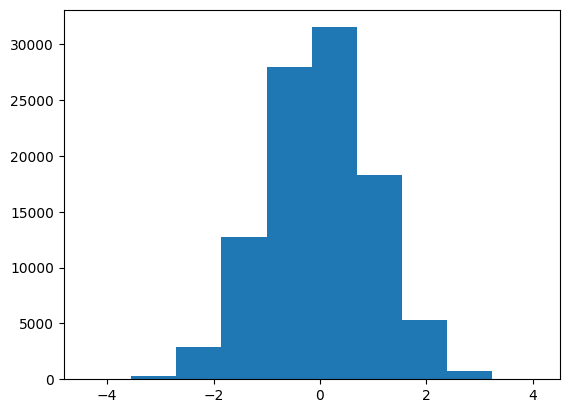

In [27]:
plt.hist(x)

In [30]:
from tqdm import tqdm
blocks = [5, 10, 20, 50, 100, 200, 250, 500]
stds = []
for b in tqdm(blocks):
    stds.append(block_jackknife_std(x, b))

100%|██████████| 8/8 [00:01<00:00,  4.03it/s]


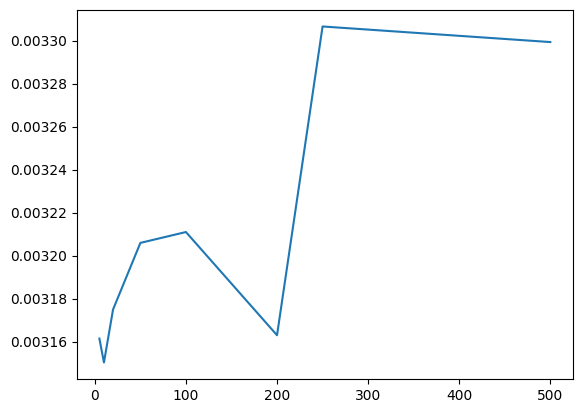

In [31]:
plt.plot(blocks, stds) 